In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
# Loading the Dataset

data = pd.read_csv("default of credit card clients csv.csv")
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:

data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#Checking for missing values

Total = data.isnull().sum().sort_values(ascending=False)
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)
Percent

ID                            0.0
BILL_AMT2                     0.0
PAY_AMT6                      0.0
PAY_AMT5                      0.0
PAY_AMT4                      0.0
PAY_AMT3                      0.0
PAY_AMT2                      0.0
PAY_AMT1                      0.0
BILL_AMT6                     0.0
BILL_AMT5                     0.0
BILL_AMT4                     0.0
BILL_AMT3                     0.0
BILL_AMT1                     0.0
LIMIT_BAL                     0.0
PAY_6                         0.0
PAY_5                         0.0
PAY_4                         0.0
PAY_3                         0.0
PAY_2                         0.0
PAY_0                         0.0
AGE                           0.0
MARRIAGE                      0.0
EDUCATION                     0.0
SEX                           0.0
default payment next month    0.0
dtype: float64

In [6]:
#Checking duplicates

data.duplicated().sum()

0

In [7]:
# Eliminating the duplicates

data.drop_duplicates(inplace=True)
data.shape

(30000, 25)

In [8]:
data['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

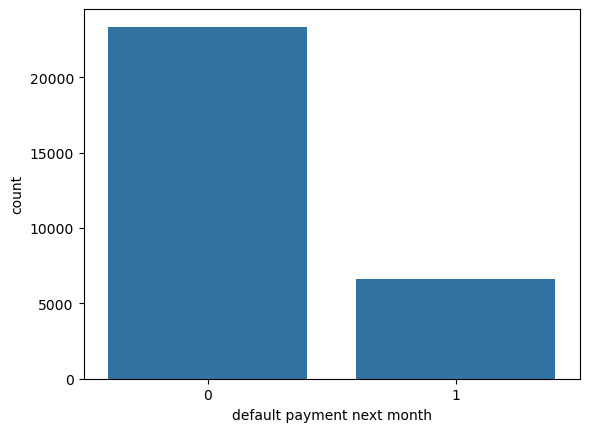

In [9]:
# Checking the distribution of customers on Revenue (Target column)

data_target = data['default payment next month'].copy()
data_target.value_counts()

# plot the countplot of the variable 'Revenue'
sns.countplot(x = data_target)

plt.show()

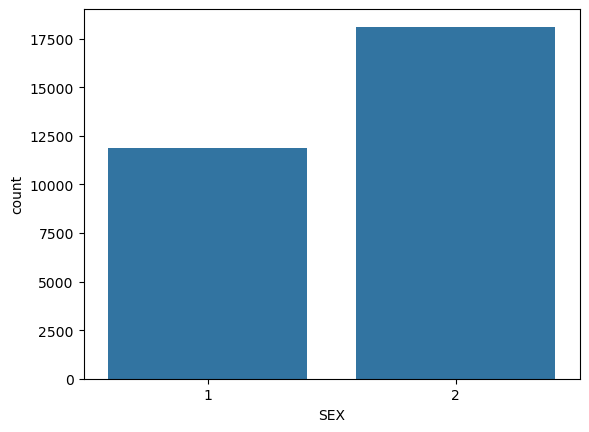

In [10]:
# Checking the distribution of customers on Weekend column

data_target = data['SEX'].copy()
data_target.value_counts()

# plot the countplot of the variable 'Revenue'
sns.countplot(x = data_target)

plt.show()

In [11]:
#Extracting the numeric data from df

numeric_data = data.select_dtypes('number')
numeric_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [12]:
numeric_data.skew()

ID                             0.000000
LIMIT_BAL                      0.992867
SEX                           -0.424183
EDUCATION                      0.970972
MARRIAGE                      -0.018742
AGE                            0.732246
PAY_0                          0.731975
PAY_2                          0.790565
PAY_3                          0.840682
PAY_4                          0.999629
PAY_5                          1.008197
PAY_6                          0.948029
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default payment next month     1.343504


In [13]:
numeric_columns=list(numeric_data)
numeric_columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

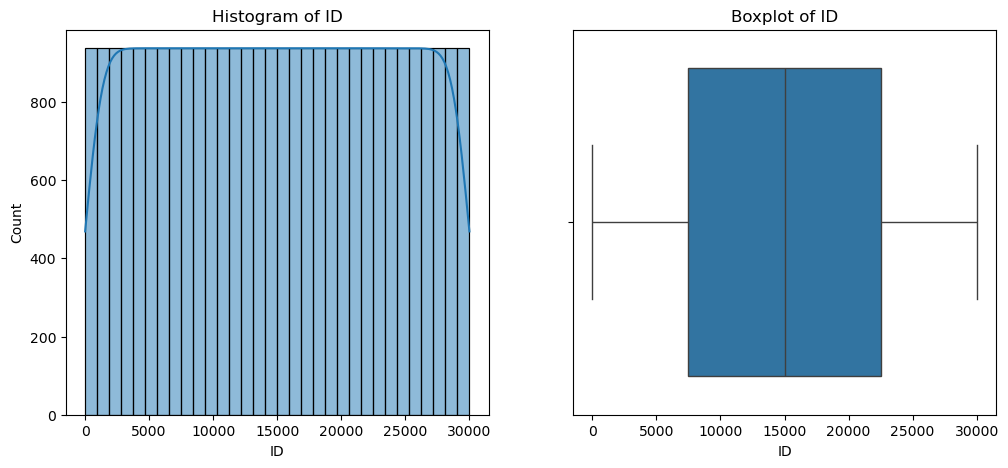

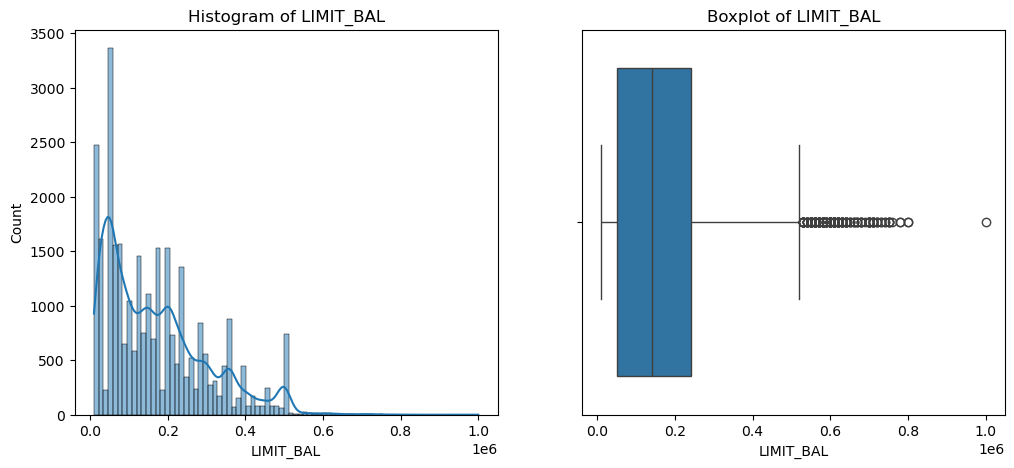

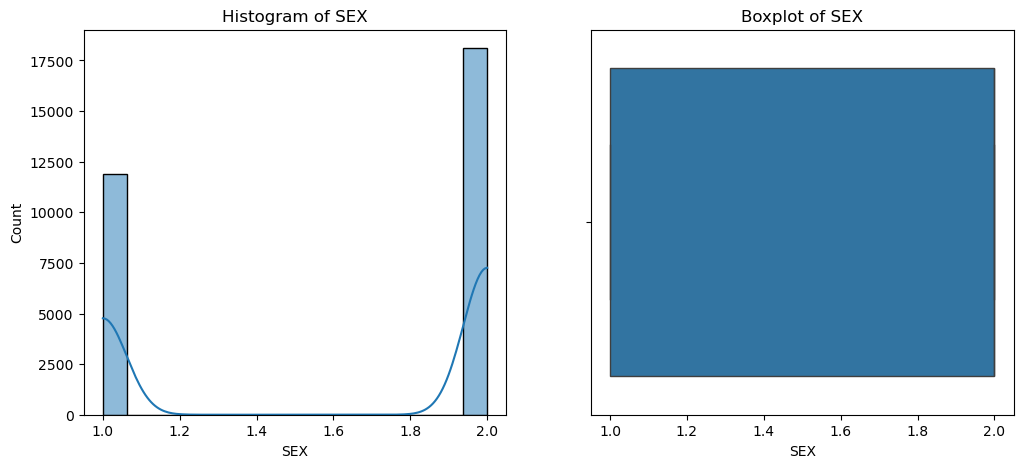

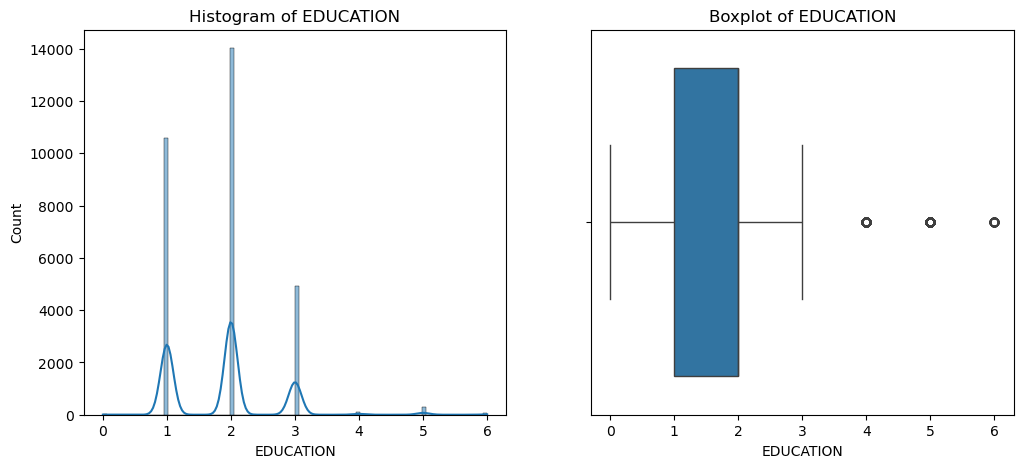

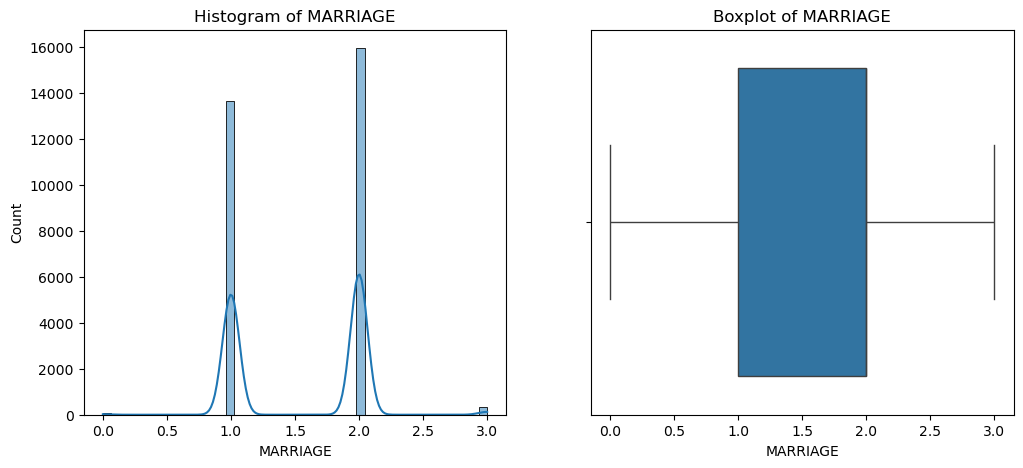

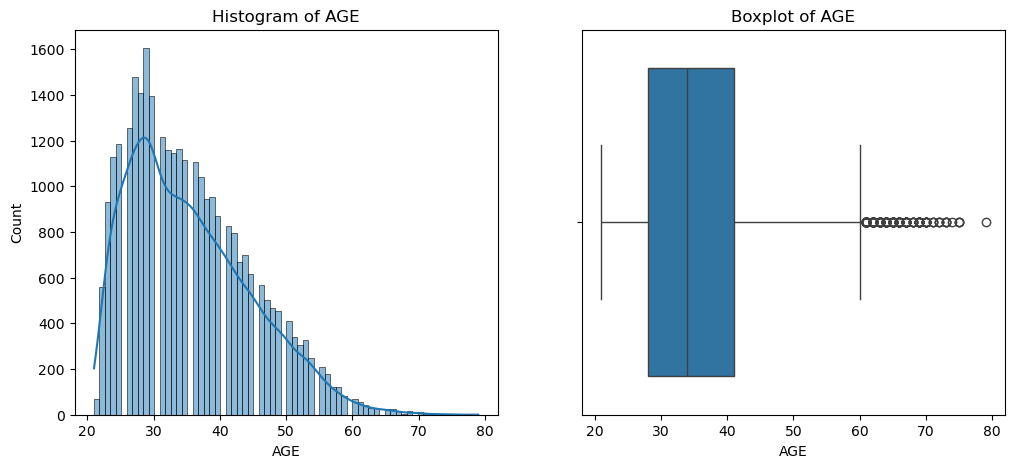

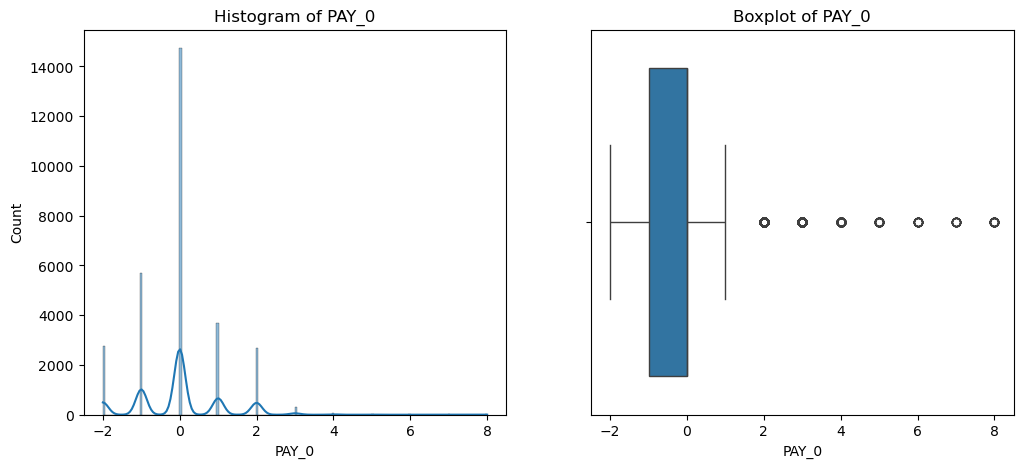

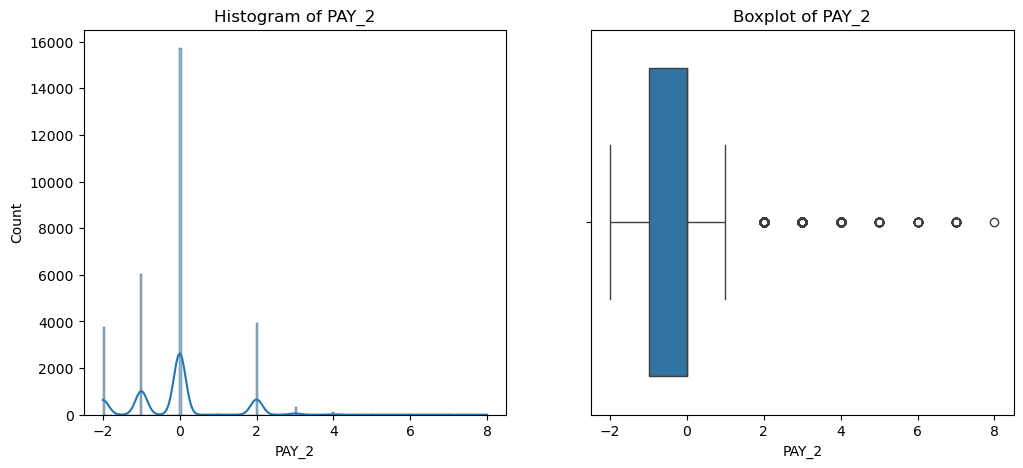

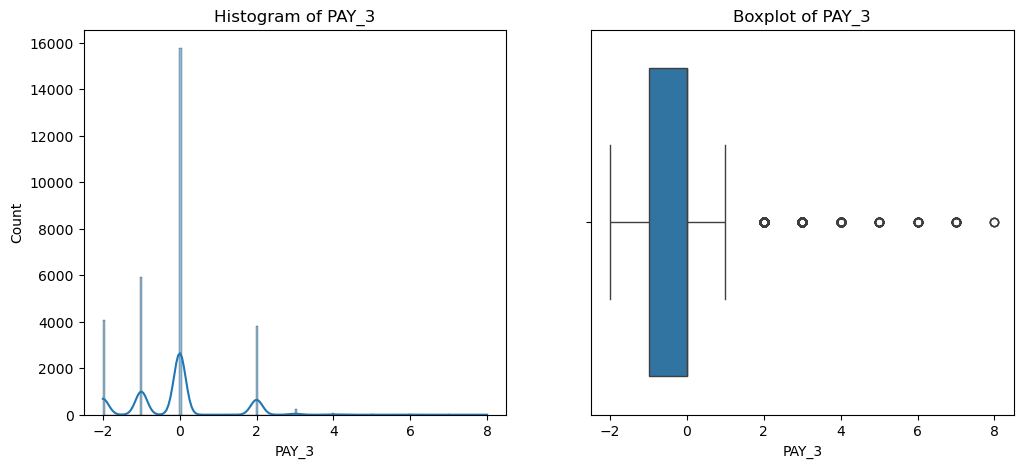

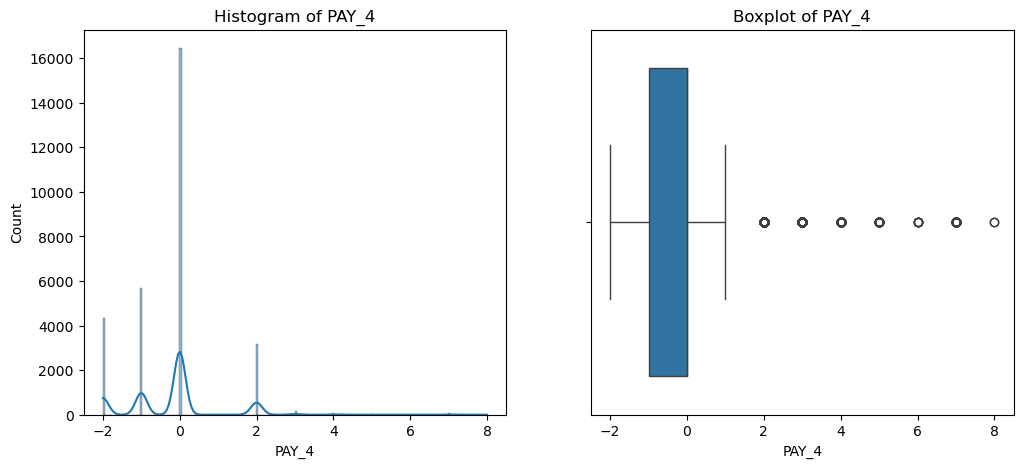

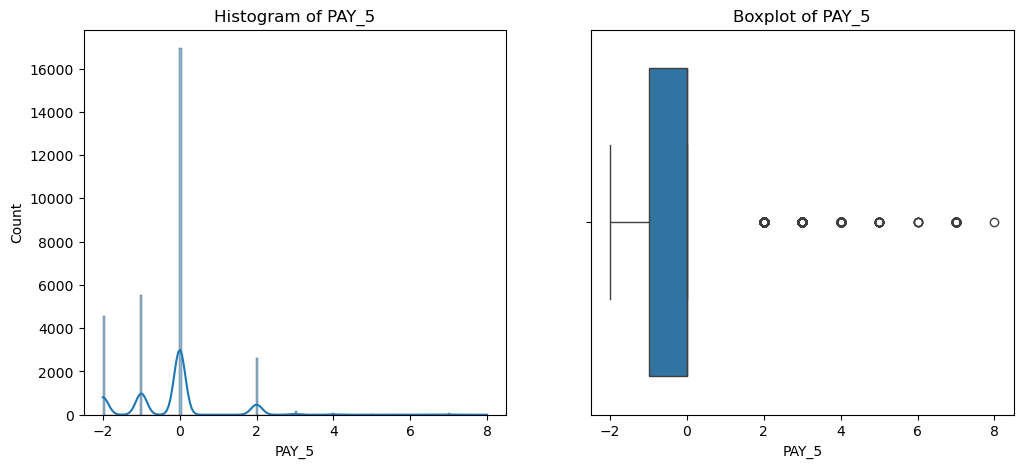

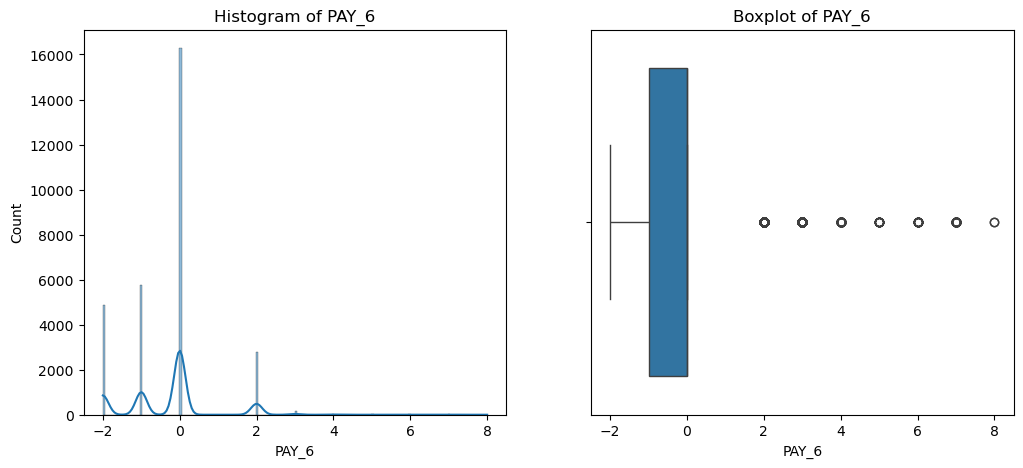

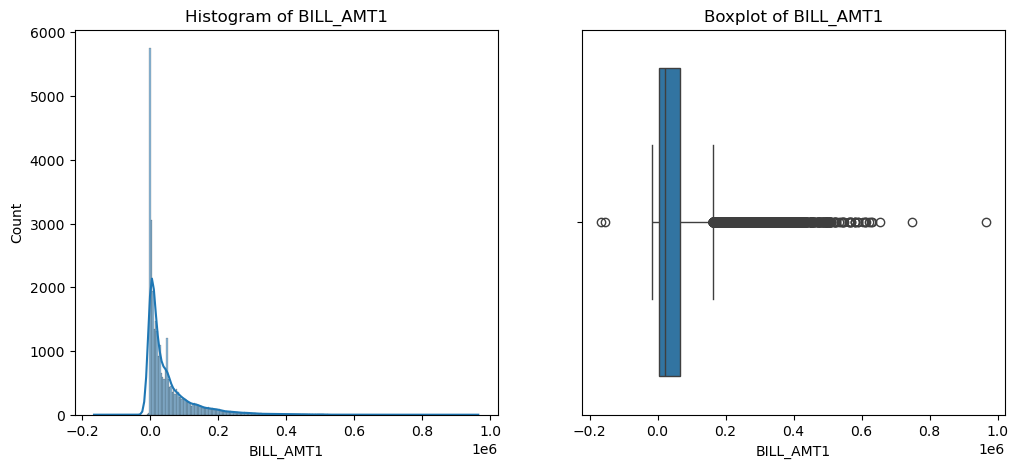

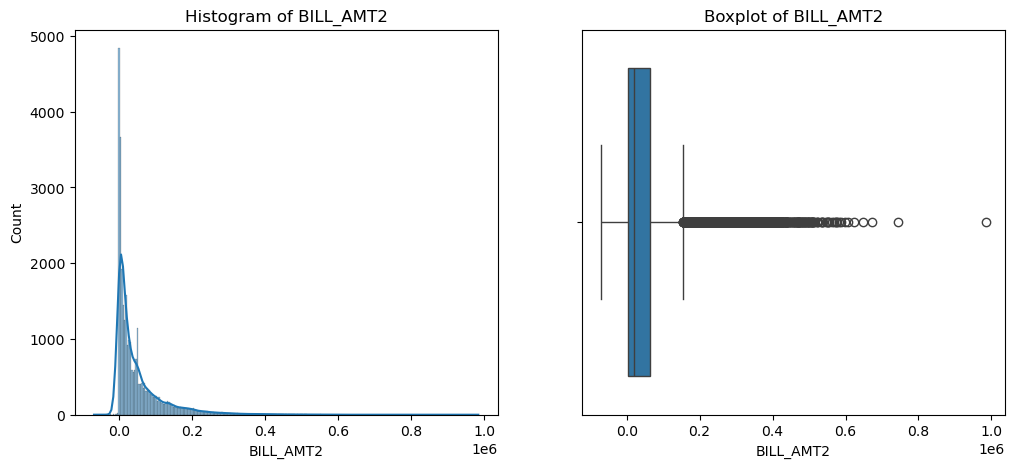

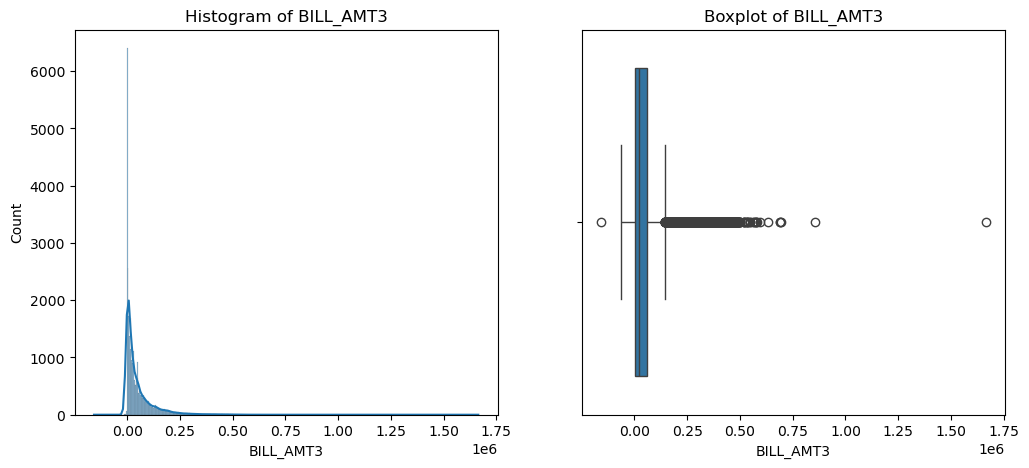

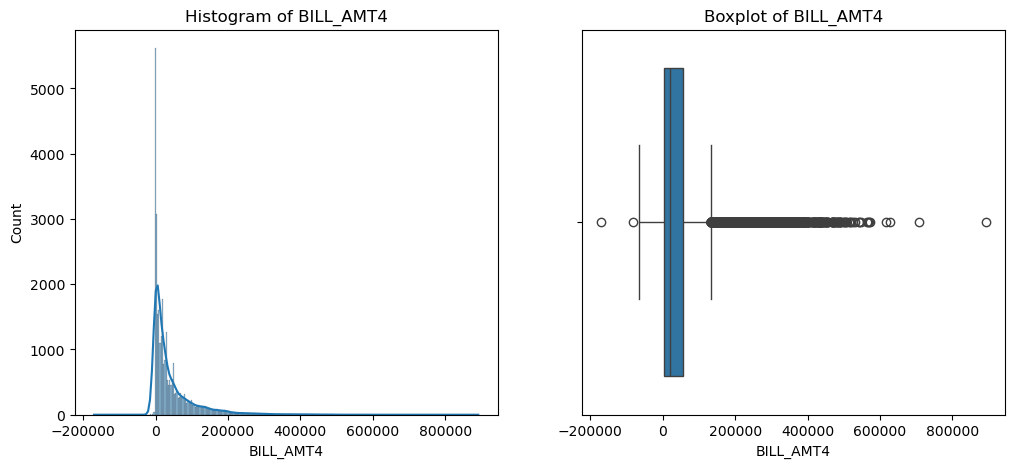

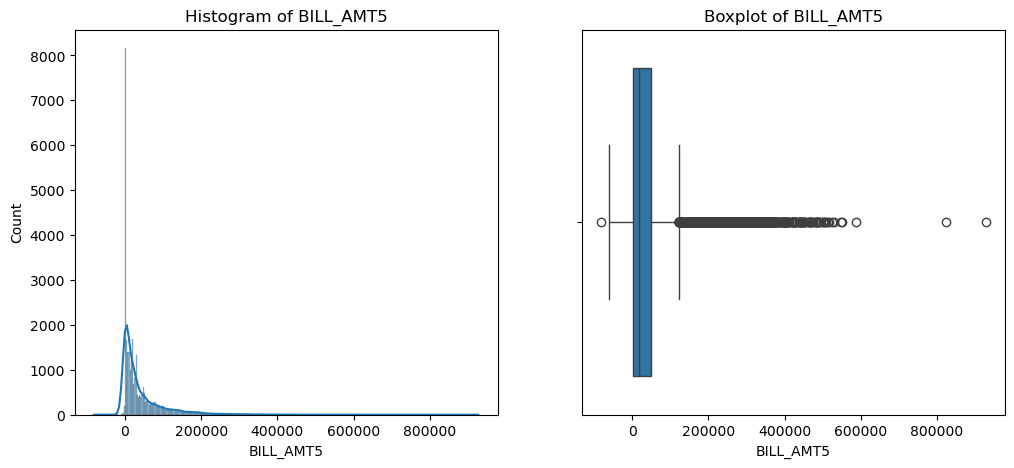

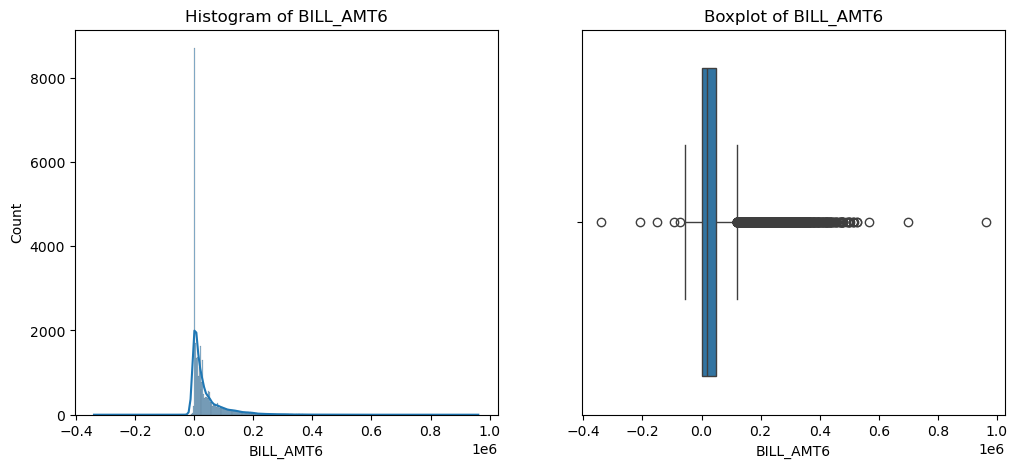

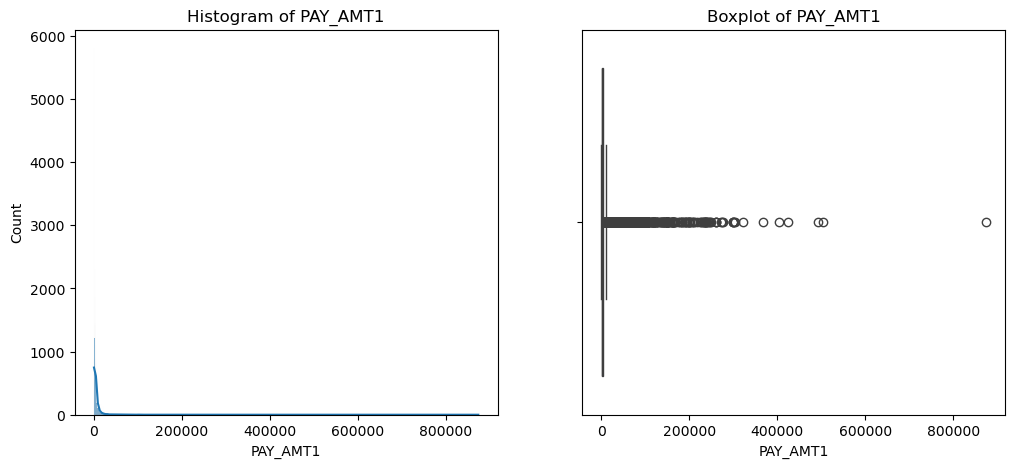

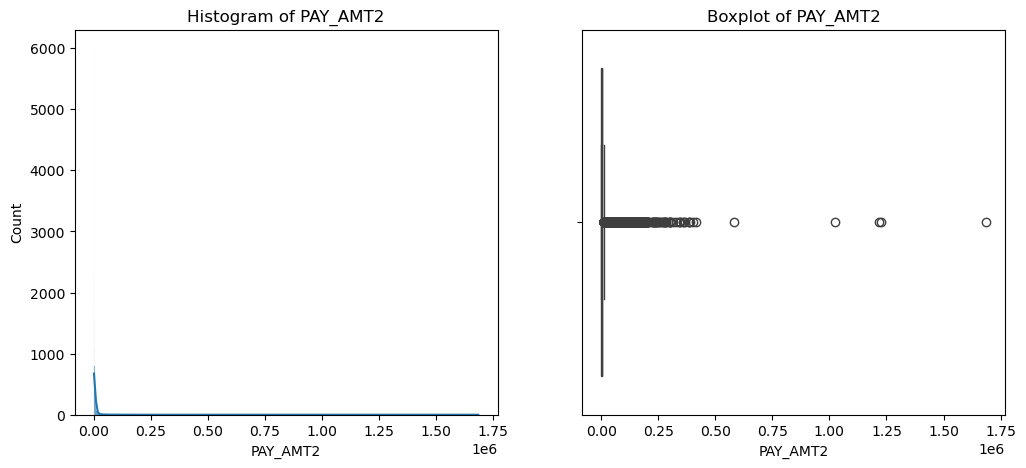

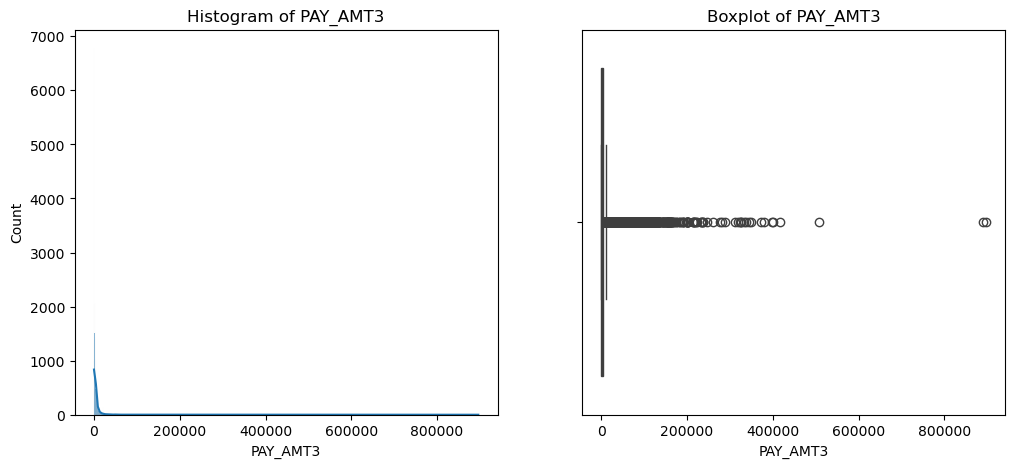

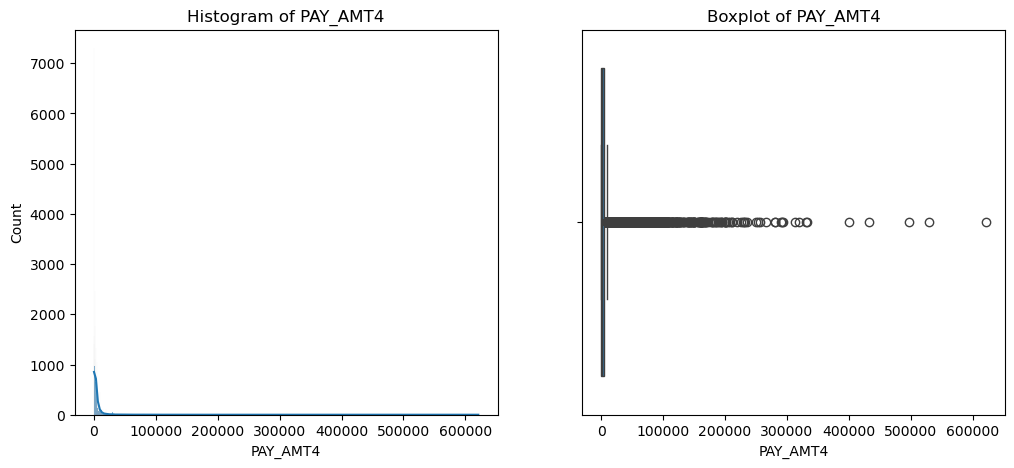

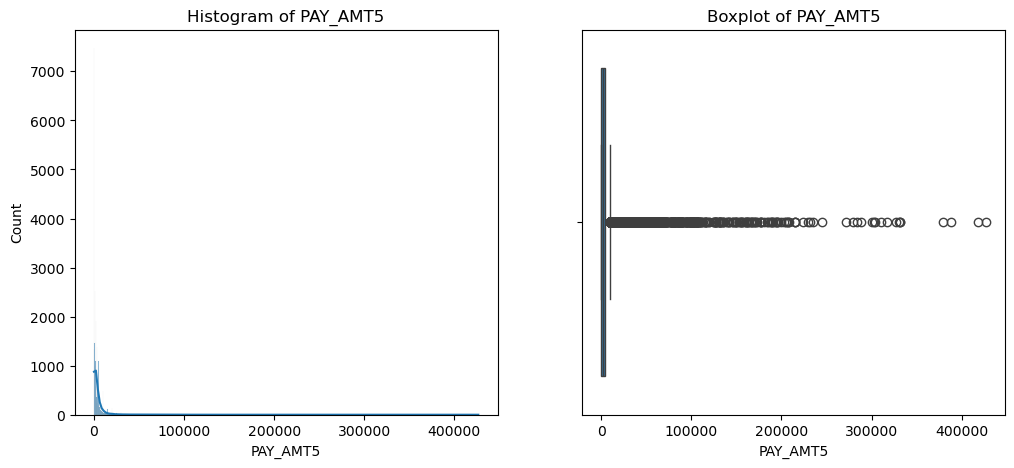

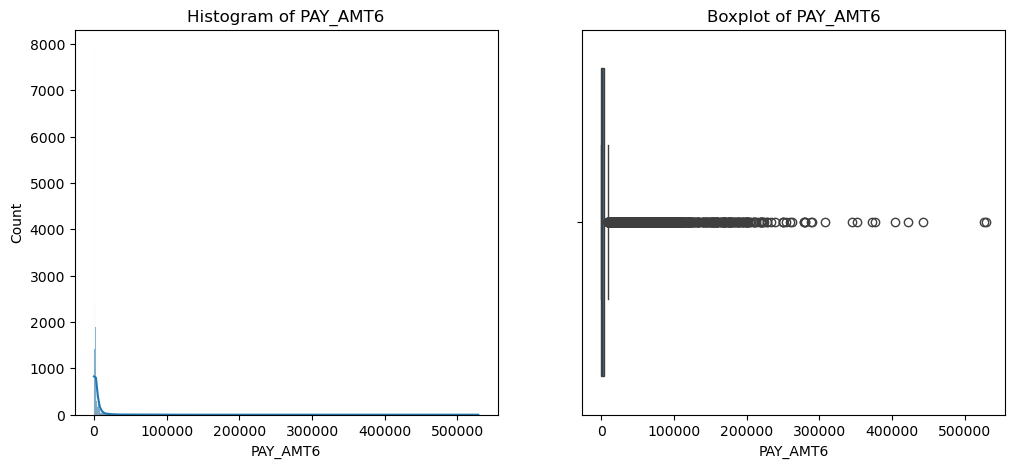

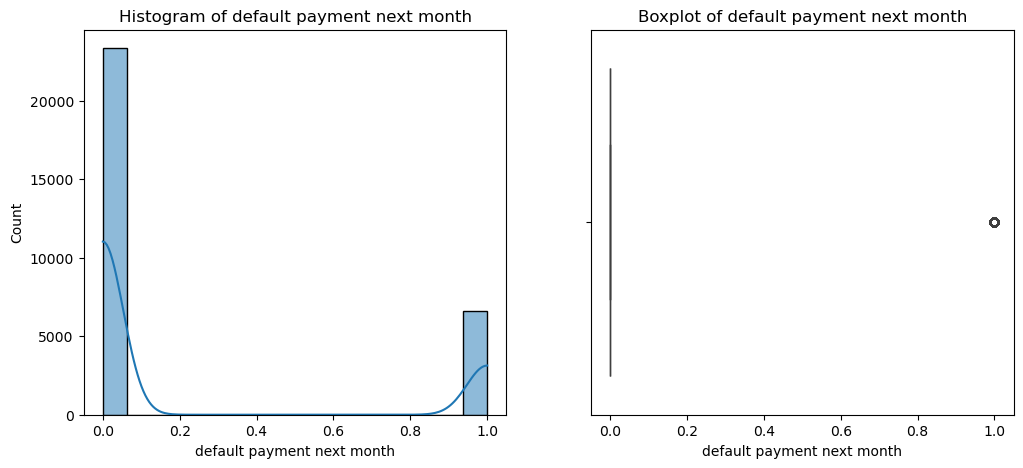

In [14]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

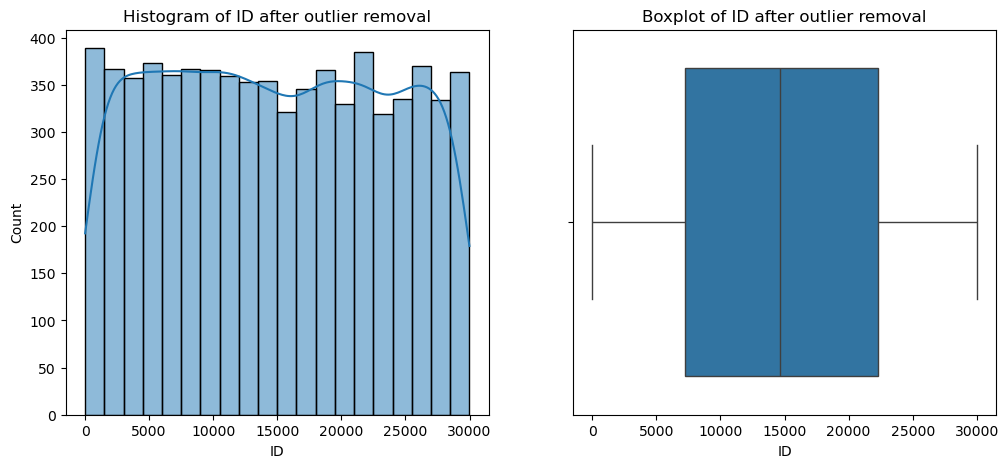

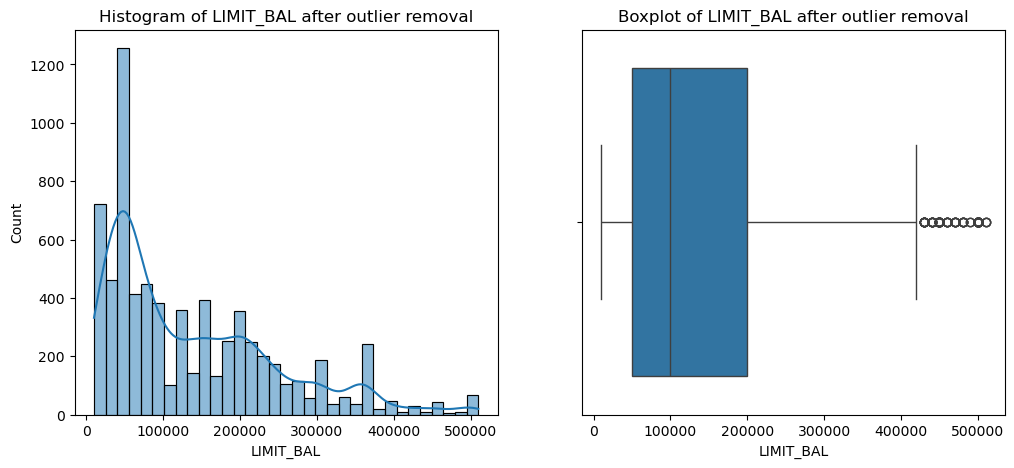

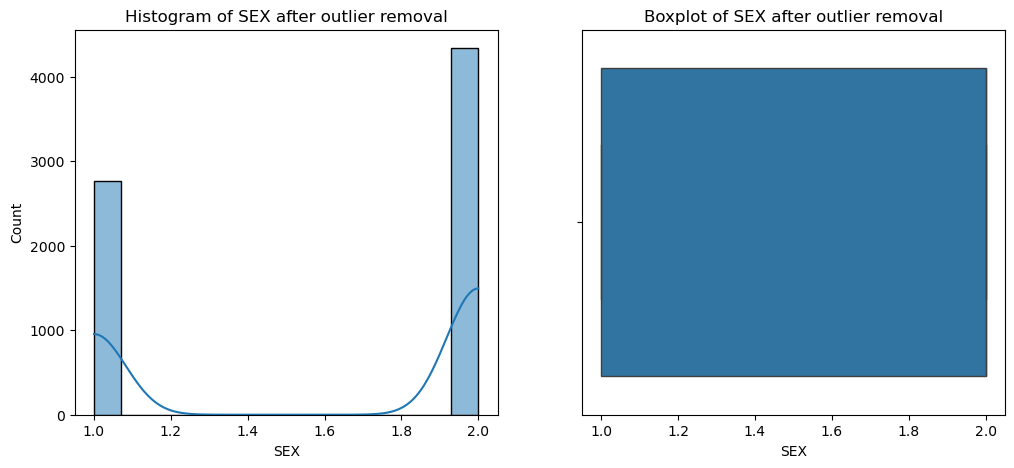

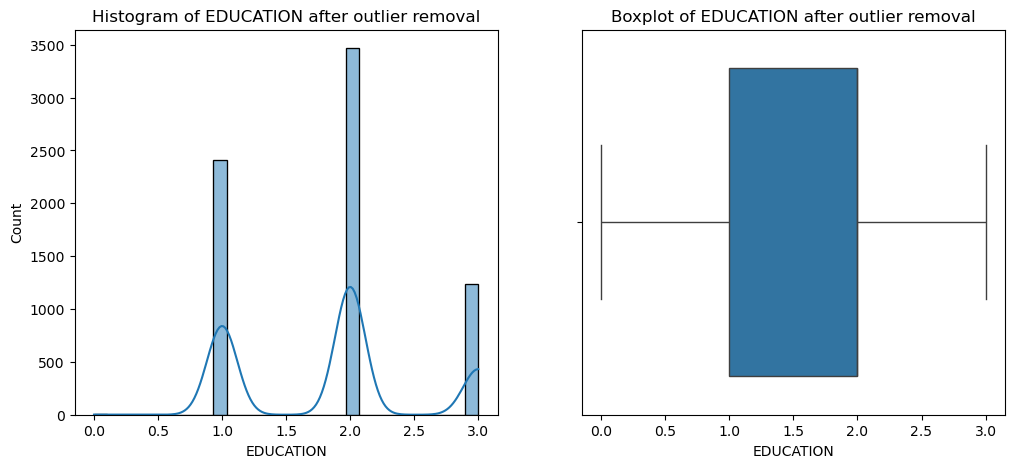

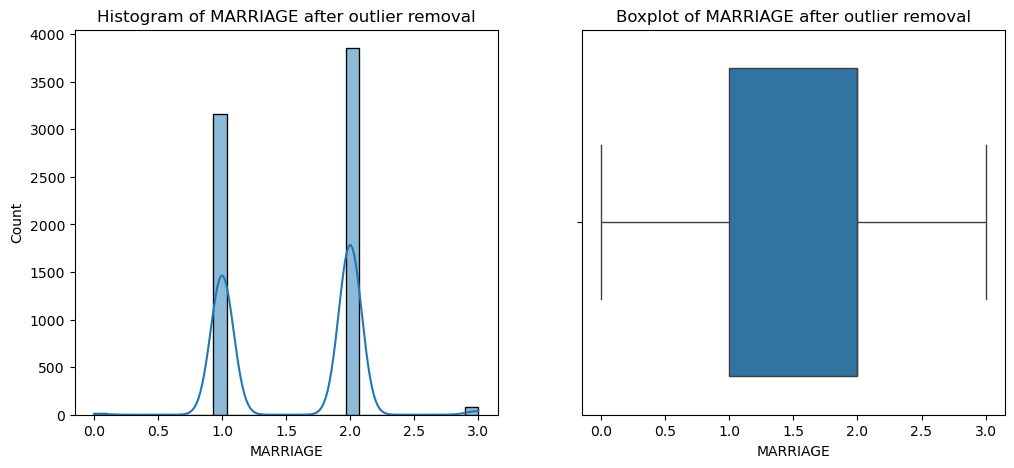

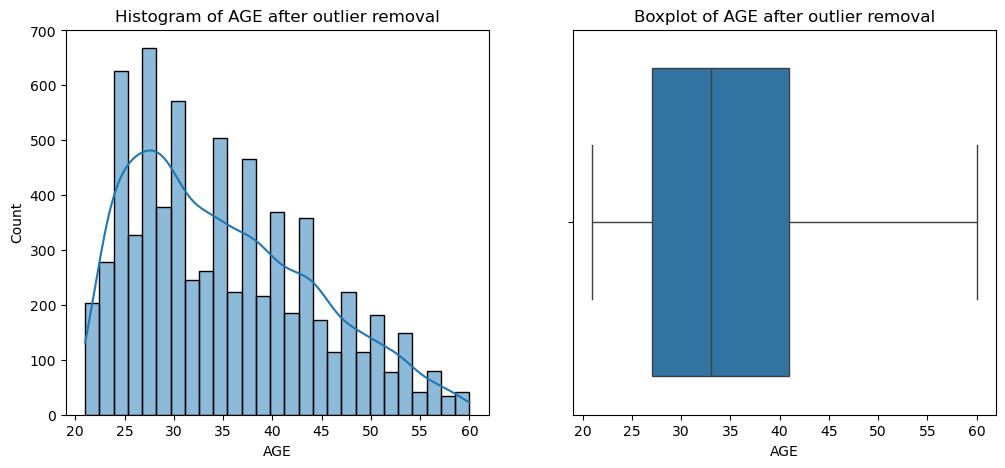

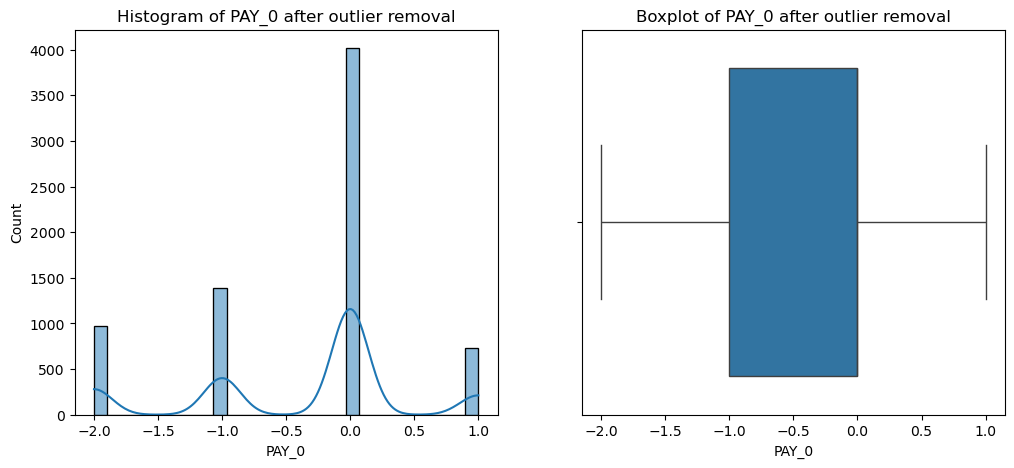

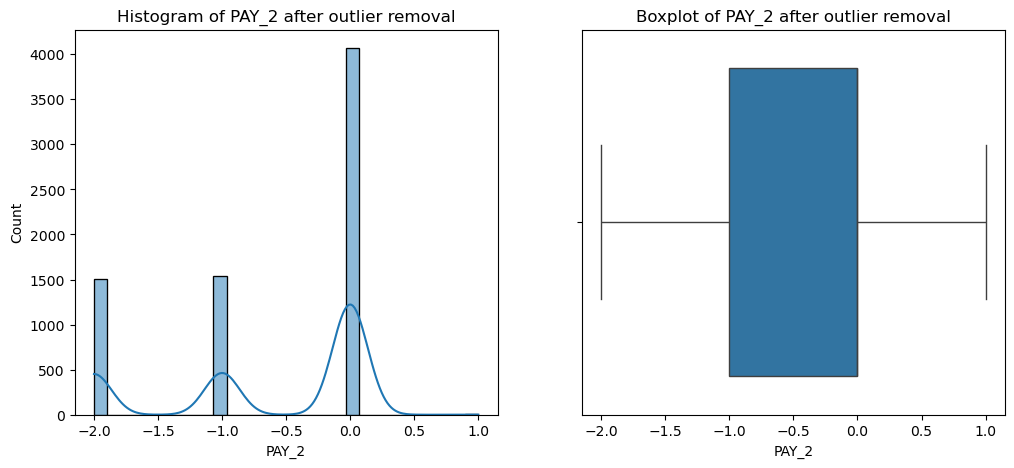

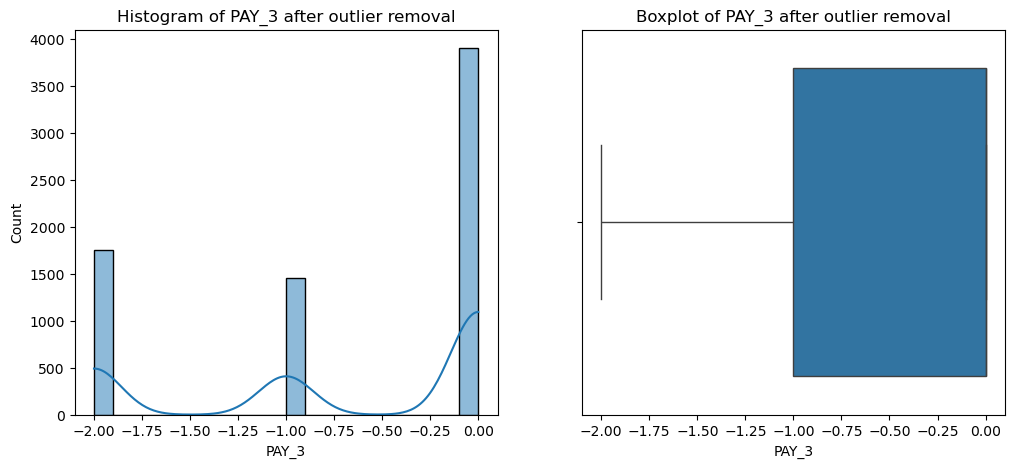

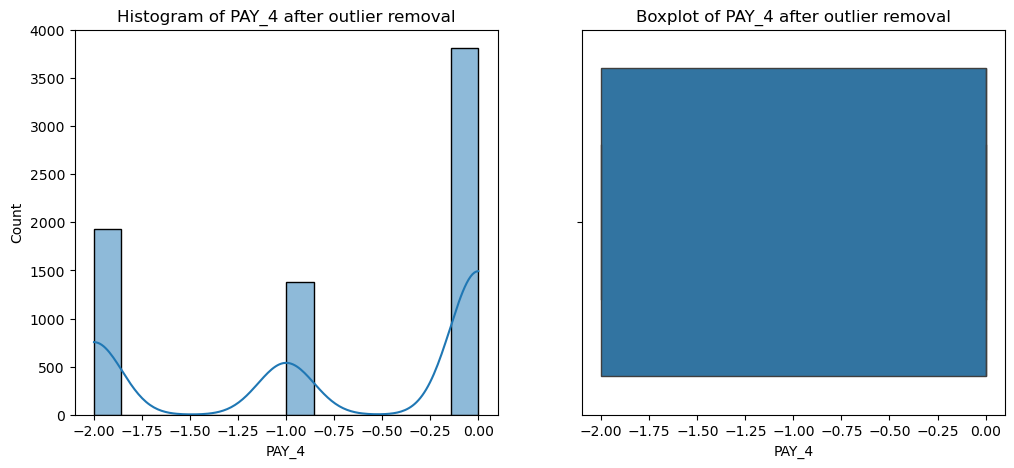

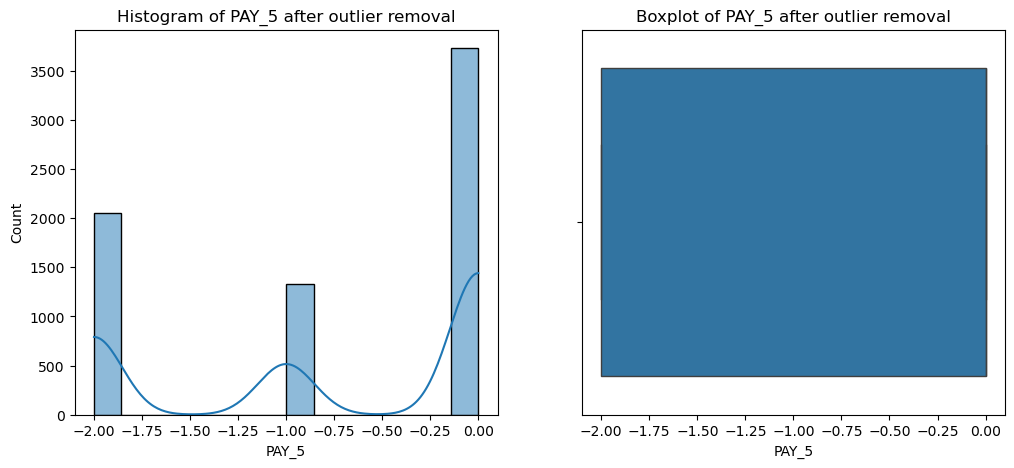

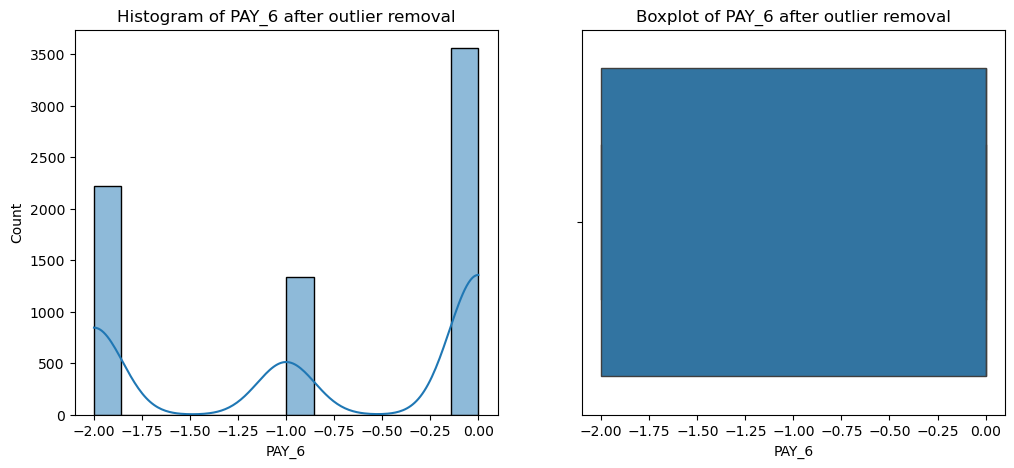

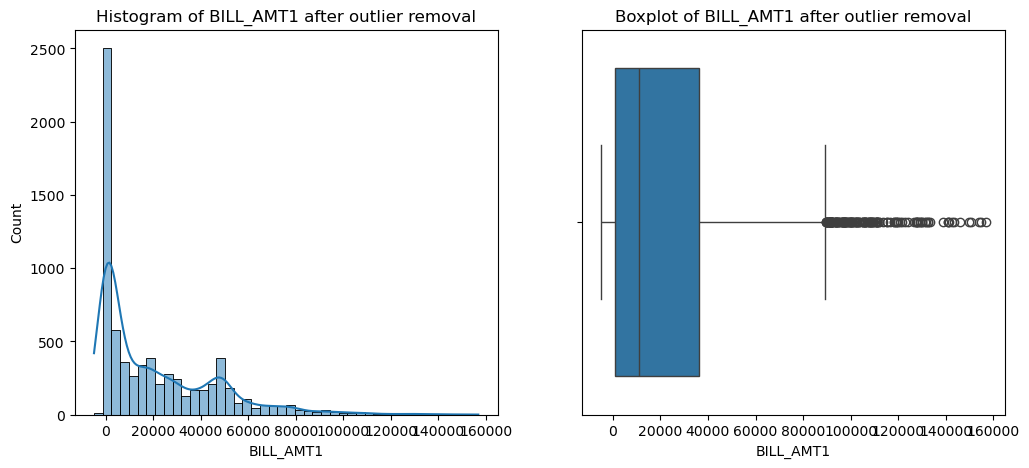

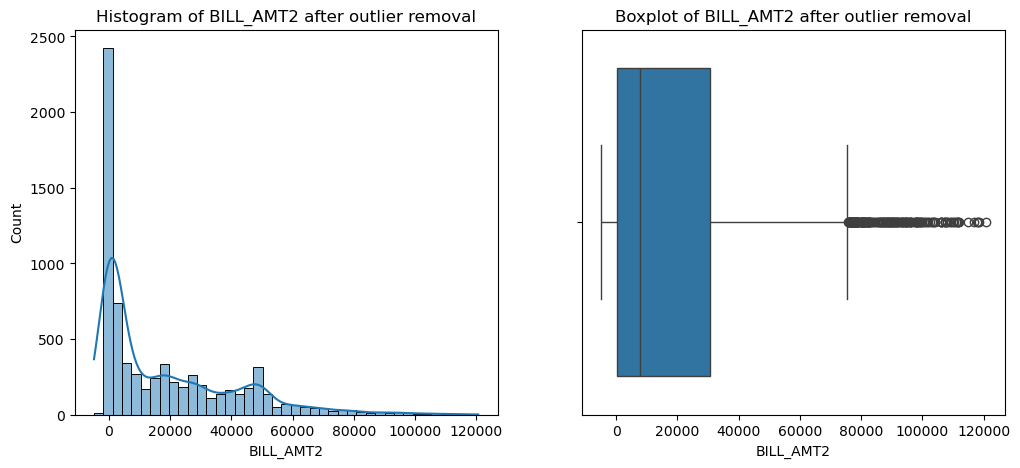

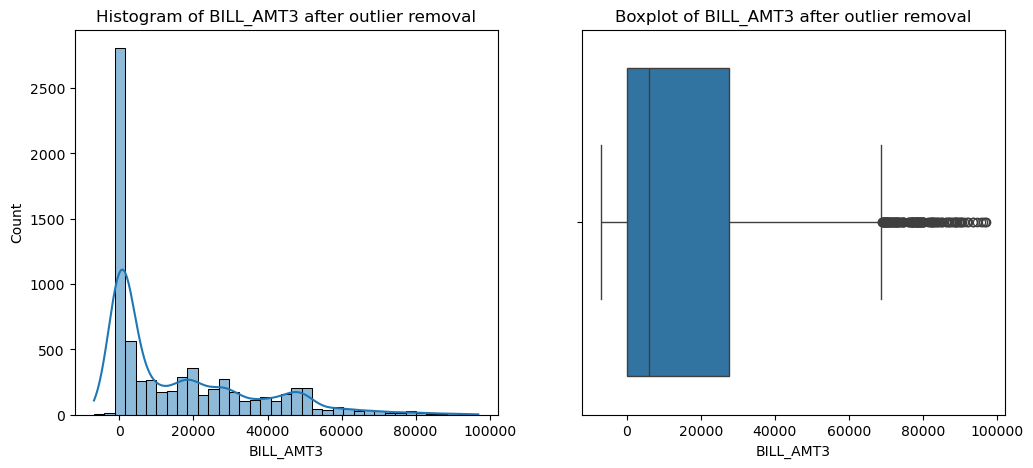

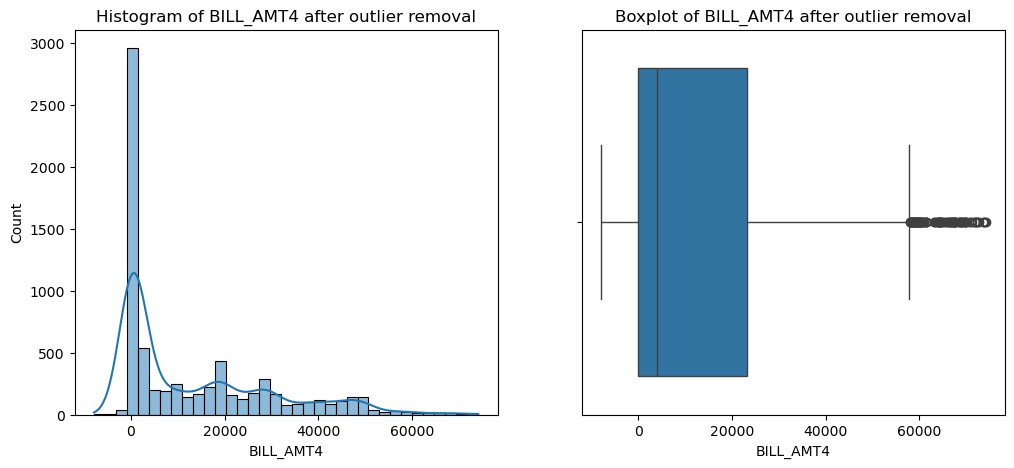

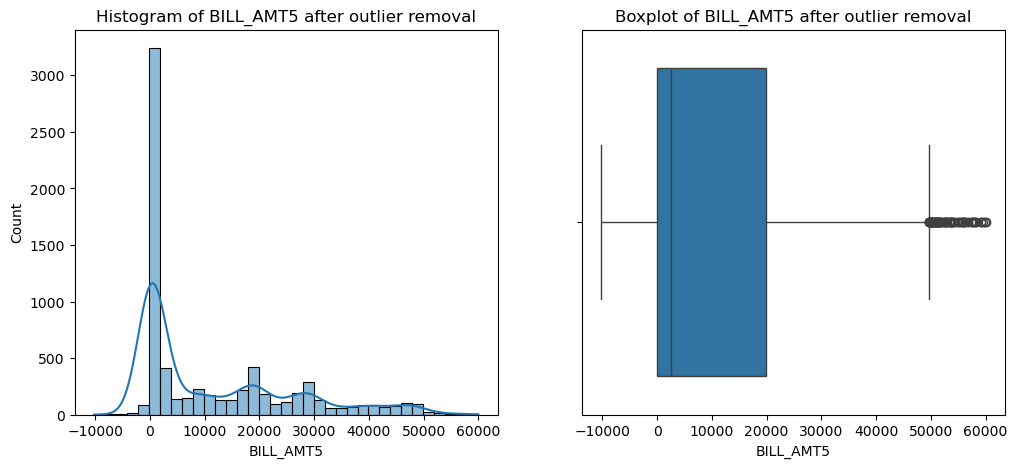

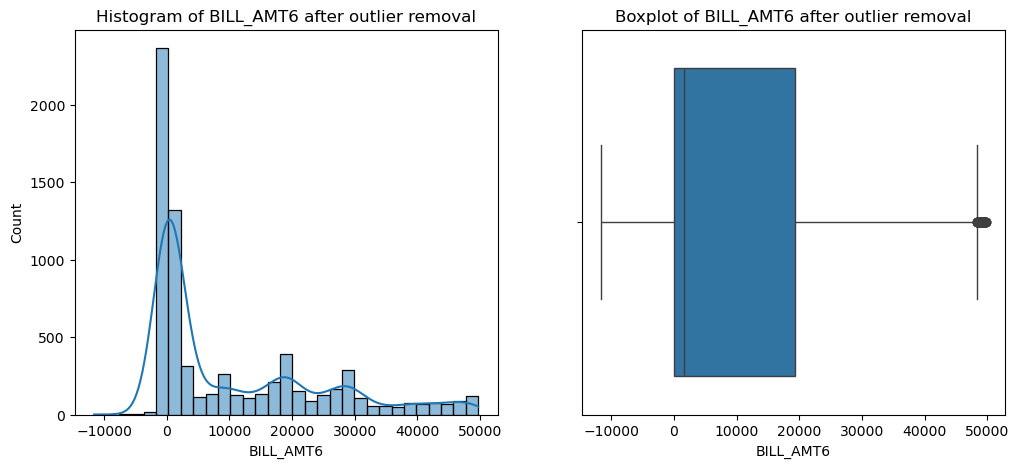

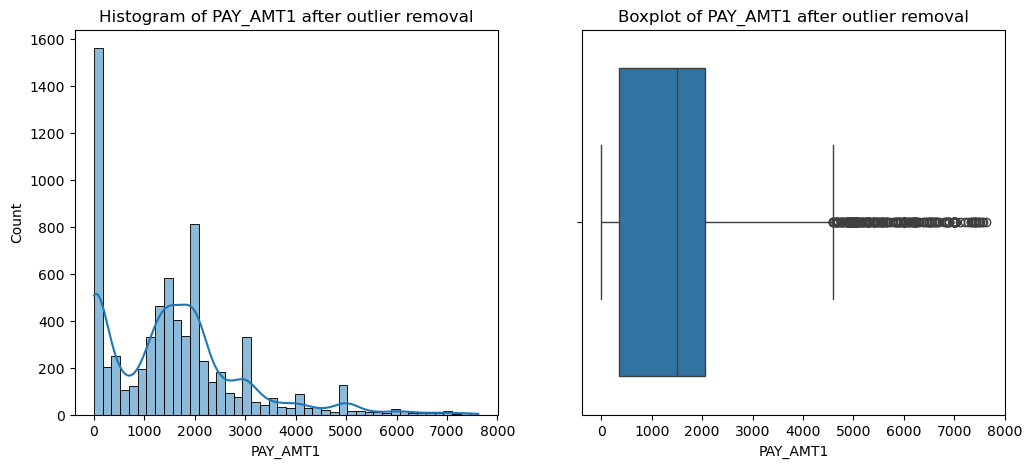

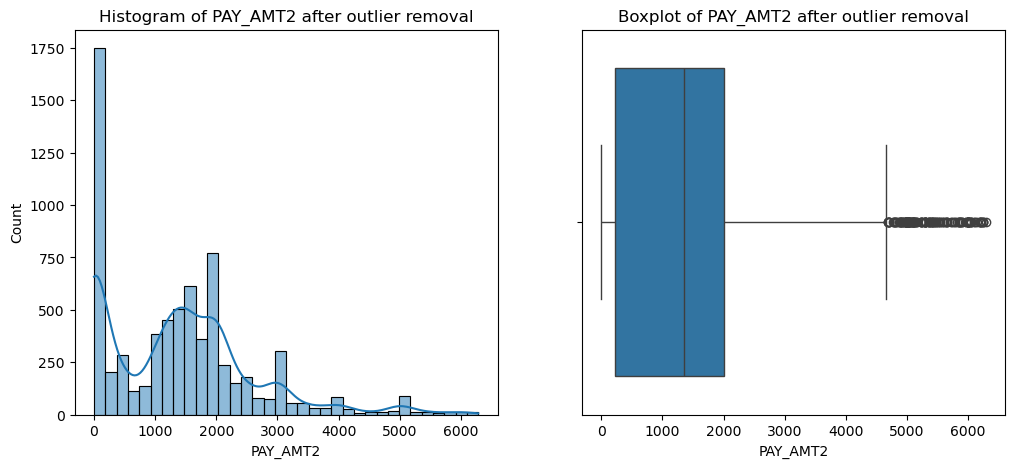

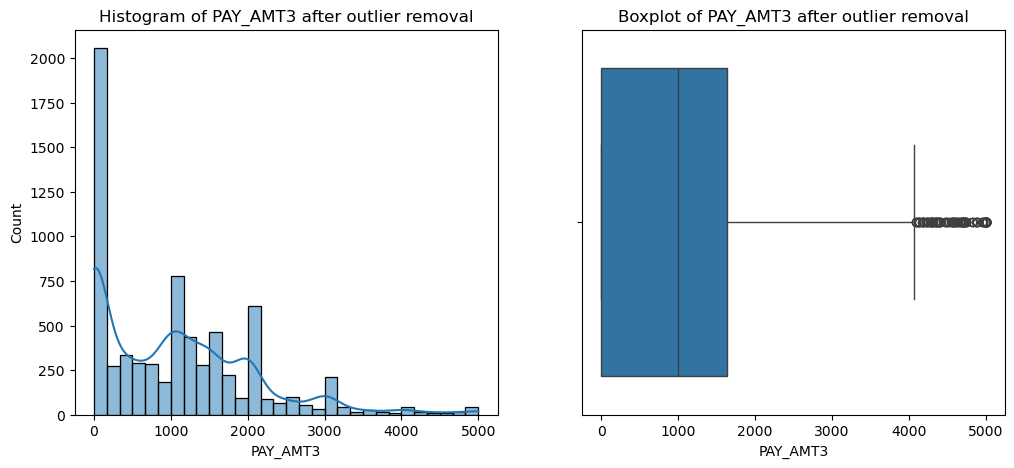

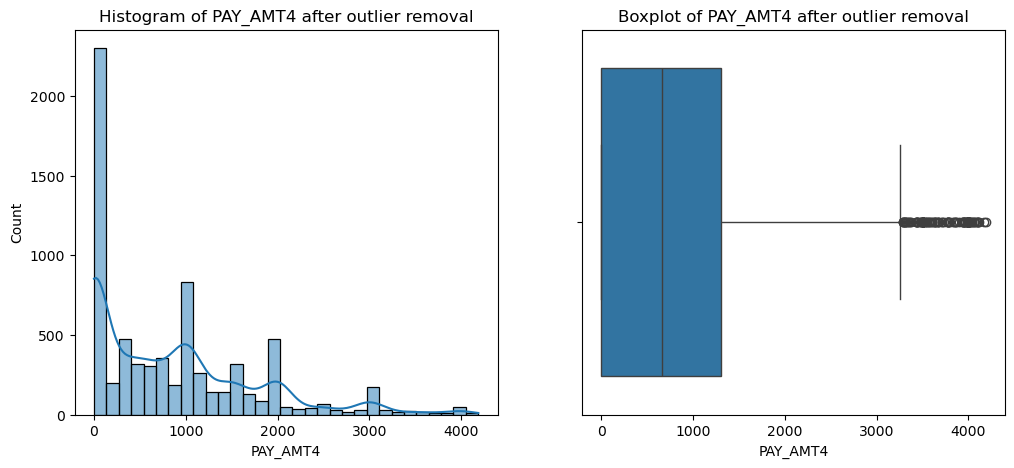

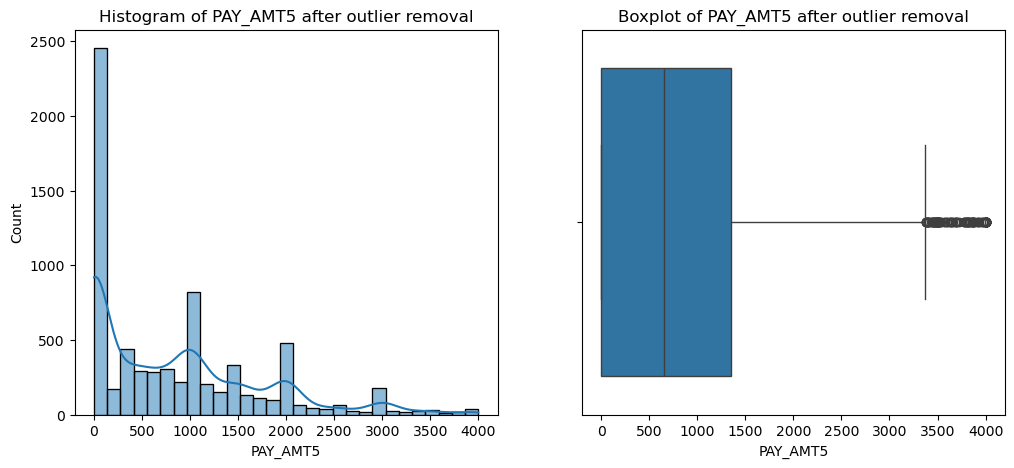

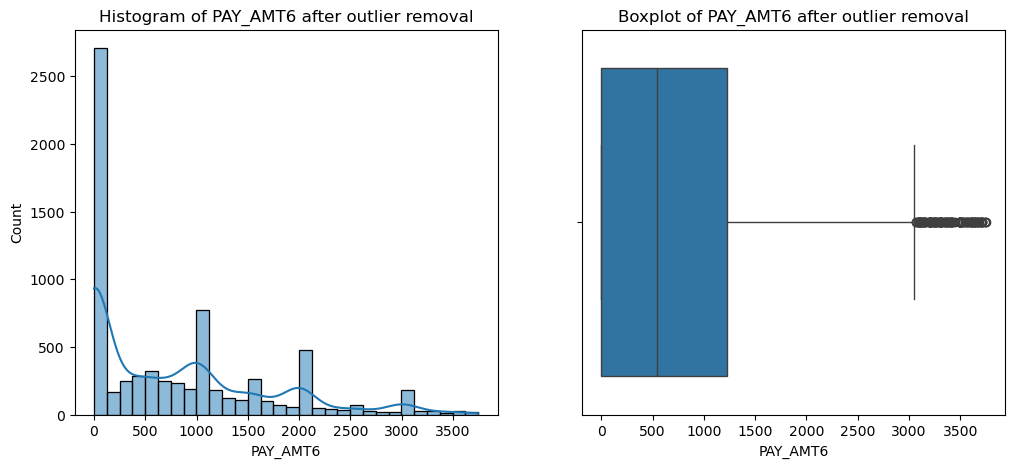

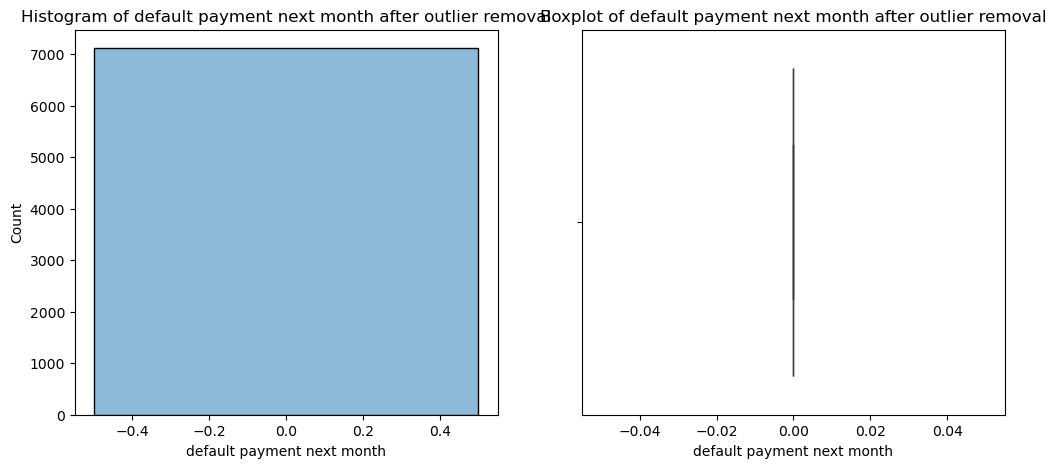

In [15]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a filtered DataFrame that excludes outliers
    return data[(data[column] >= lower_bound) &  (data[column] <= upper_bound)]

# Start with the original data
cleaned_data = data.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

# Visualize the cleaned data again to confirm outliers are removed
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

In [16]:
cleaned_data.select_dtypes('number').skew()

ID                            0.028987
LIMIT_BAL                     1.071991
SEX                          -0.452267
EDUCATION                     0.229736
MARRIAGE                     -0.060801
AGE                           0.585401
PAY_0                        -0.593157
PAY_2                        -0.742252
PAY_3                        -0.615624
PAY_4                        -0.536164
PAY_5                        -0.476288
PAY_6                        -0.376314
BILL_AMT1                     1.462896
BILL_AMT2                     1.327199
BILL_AMT3                     1.247149
BILL_AMT4                     1.159328
BILL_AMT5                     1.126315
BILL_AMT6                     1.187405
PAY_AMT1                      1.167665
PAY_AMT2                      0.989181
PAY_AMT3                      1.082095
PAY_AMT4                      1.164108
PAY_AMT5                      1.087198
PAY_AMT6                      1.079008
default payment next month    0.000000
dtype: float64

In [17]:

cleaned_data.shape

(7115, 25)

In [18]:
#checking how skewness would have turned out for log transformation

for i in numeric_columns:
    print('skewness of column {}'.format(i),' ',np.log(data[i]+1).skew())

skewness of column ID   -1.965803195790545
skewness of column LIMIT_BAL   -0.5134319757766
skewness of column SEX   -0.4241834271156975
skewness of column EDUCATION   0.18956694458778148
skewness of column MARRIAGE   -0.20906666732156498
skewness of column AGE   0.2557333940746875
skewness of column PAY_0   nan
skewness of column PAY_2   nan
skewness of column PAY_3   nan
skewness of column PAY_4   nan
skewness of column PAY_5   nan
skewness of column PAY_6   nan
skewness of column BILL_AMT1   nan
skewness of column BILL_AMT2   nan
skewness of column BILL_AMT3   nan
skewness of column BILL_AMT4   nan
skewness of column BILL_AMT5   nan
skewness of column BILL_AMT6   nan
skewness of column PAY_AMT1   -1.2923745143427334
skewness of column PAY_AMT2   -1.2398318805435817
skewness of column PAY_AMT3   -1.079249290067273
skewness of column PAY_AMT4   -0.9660378081275798
skewness of column PAY_AMT5   -0.9383293416409805
skewness of column PAY_AMT6   -0.854558035767588
skewness of column defau

D:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
D:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
D:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarni

In [19]:
#checking how skewness would have turned out for sqrt transformation

for i in numeric_columns:
    print('skewness of column {}'.format(i),' ',np.sqrt(data[i]).skew())

skewness of column ID   -0.5655891242363064
skewness of column LIMIT_BAL   0.27665537987394345
skewness of column SEX   -0.4241834271157048
skewness of column EDUCATION   0.32251216302335795
skewness of column MARRIAGE   -0.3567112108982901
skewness of column AGE   0.47924232857778376
skewness of column PAY_0   1.052577762726533
skewness of column PAY_2   1.4276286971290932
skewness of column PAY_3   1.5047693382943168
skewness of column PAY_4   1.8307733100289694
skewness of column PAY_5   2.112298634244026
skewness of column PAY_6   1.9916296997758254
skewness of column BILL_AMT1   0.9191307731522834
skewness of column BILL_AMT2   0.9040936096167216
skewness of column BILL_AMT3   0.9322123319166143
skewness of column BILL_AMT4   0.9451403293476492
skewness of column BILL_AMT5   0.9567770077071791
skewness of column BILL_AMT6   0.9536916310036694
skewness of column PAY_AMT1   3.0757631101449907
skewness of column PAY_AMT2   4.028330561376263
skewness of column PAY_AMT3   3.40075541799

D:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
X= cleaned_data.drop('default payment next month',axis=1)
y= cleaned_data['EDUCATION']

In [21]:

X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,6,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
7,8,100000,2,2,2,23,0,-1,-1,0,...,601,221,-159,567,380,601,0,581,1687,1542
18,19,360000,2,1,1,49,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19,20,180000,2,1,2,29,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29979,29980,180000,1,1,1,32,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29984,29985,30000,1,2,2,38,-1,-1,-2,-1,...,2939,1993,1907,3319,923,2977,1999,3057,3319,1000
29985,29986,240000,1,1,2,30,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29986,29987,360000,1,1,2,35,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [22]:

y

3        2
5        1
7        2
18       1
19       1
        ..
29979    1
29984    2
29985    1
29986    1
29992    3
Name: EDUCATION, Length: 7115, dtype: int64

In [23]:
cat_cleaned_data=X.select_dtypes(include="int")
cat_cleaned_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,6,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
7,8,100000,2,2,2,23,0,-1,-1,0,...,601,221,-159,567,380,601,0,581,1687,1542
18,19,360000,2,1,1,49,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19,20,180000,2,1,2,29,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29979,29980,180000,1,1,1,32,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29984,29985,30000,1,2,2,38,-1,-1,-2,-1,...,2939,1993,1907,3319,923,2977,1999,3057,3319,1000
29985,29986,240000,1,1,2,30,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29986,29987,360000,1,1,2,35,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [24]:
cat_cleaned_data_columns=list(cat_cleaned_data)
cat_cleaned_data_columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [25]:
cat_cleaned_data_x=pd.read_csv('default of credit card clients csv.csv')

In [26]:
print(cat_cleaned_data_x.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
cat_cleaned_data_X = pd.read_csv('default of credit card clients csv.csv')  # Replace with your actual file path

# Preview the data
print(cat_cleaned_data_X.head())

# Check for missing values
print(cat_cleaned_data_X.isnull().sum())

# Handle missing values (if any). For example, you could fill them or drop them:
# cat_cleaned_data_X.fillna(0, inplace=True)  # Example of filling NaN with 0

# Normalize or standardize numerical features
scaler = MinMaxScaler()
cat_cleaned_data_X[['SEX', 'LIMIT_BAL']] = scaler.fit_transform(cat_cleaned_data_X[['SEX', 'LIMIT_BAL']])


# Define your target variable and features
y = cat_cleaned_data_X['default payment next month']  # Target variable
X = cat_cleaned_data_X.drop(columns=['LIMIT_BAL'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preview the training and testing sets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [28]:
# Initialize the RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [29]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                       Feature  Importance
23  default payment next month    0.792546
5                        PAY_0    0.052470
6                        PAY_2    0.026504
7                        PAY_3    0.018322
8                        PAY_4    0.013108
9                        PAY_5    0.009931
17                    PAY_AMT1    0.008186
10                       PAY_6    0.007688
18                    PAY_AMT2    0.006380
0                           ID    0.006084
11                   BILL_AMT1    0.005680
12                   BILL_AMT2    0.005600
19                    PAY_AMT3    0.005336
20                    PAY_AMT4    0.005294
13                   BILL_AMT3    0.004982
22                    PAY_AMT6    0.004929
4                          AGE    0.004817
14                   BILL_AMT4    0.004792
16                   BILL_AMT6    0.004725
15                   BILL_AMT5    0.004693
21                    PAY_AMT5    0.004582
2                    EDUCATION    0.001563
3          

In [30]:
# Set a threshold
threshold = 0.006

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

Selected Features:
                       Feature  Importance
23  default payment next month    0.792546
5                        PAY_0    0.052470
6                        PAY_2    0.026504
7                        PAY_3    0.018322
8                        PAY_4    0.013108
9                        PAY_5    0.009931
17                    PAY_AMT1    0.008186
10                       PAY_6    0.007688
18                    PAY_AMT2    0.006380
0                           ID    0.006084


In [31]:
#selecting the important features as x

X_selected = X[selected_features['Feature']]
X_selected

,default payment next month,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,PAY_6,PAY_AMT2,ID
0,1,2,2,-1,-1,-2,0,-2,689,1
1,1,-1,2,0,0,0,0,2,1000,2
2,0,0,0,0,0,0,1518,0,1500,3
3,0,0,0,0,0,0,2000,0,2019,4
4,0,-1,0,-1,0,0,2000,0,36681,5
...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,8500,0,20000,29996
29996,0,-1,-1,-1,-1,0,1837,0,3526,29997
29997,1,4,3,2,-1,0,0,0,0,29998
29998,1,1,-1,0,0,0,85900,-1,3409,29999


In [32]:
# Fit the scaler on the selected features and transform them
X_standardized = StandardScaler().fit_transform(X_selected)

# Convert the numpy array back to a DataFrame for easier handling
X_standardized = pd.DataFrame(X_standardized, columns=X_selected.columns)

# Display the standardized data
(X_standardized.head())

,default payment next month,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,PAY_6,PAY_AMT2,ID
0,1.876378,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-0.341942,-1.486041,-0.227086,-1.731993
1,1.876378,-0.874991,1.782348,0.138865,0.188746,0.234917,-0.341942,1.992316,-0.213588,-1.731878
2,-0.532942,0.014861,0.111736,0.138865,0.188746,0.234917,-0.250292,0.253137,-0.191887,-1.731762
3,-0.532942,0.014861,0.111736,0.138865,0.188746,0.234917,-0.221191,0.253137,-0.169361,-1.731647
4,-0.532942,-0.874991,0.111736,-0.696663,0.188746,0.234917,-0.221191,0.253137,1.335034,-1.731531


In [33]:
X = X_standardized

# Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (24000, 10)
Testing Features Shape: (6000, 10)
Training Target Shape: (24000,)
Testing Target Shape: (6000,)
